In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# DATA_DIR = '../../../In-situ Meas Data/Build Command Data/XYPT Commands/' # Directory of XYPT files
DATA_DIR = '../../Build Command Data/XYPT Commands/' # Directory of XYPT files
# DATA_DIR = '../../../RTC_Images/'

dt = 1E-5 # 10 microseconds

In [ ]:
# data = pd.read_csv(DATA_DIR + 'T500_3D_Scan_Strategies_fused_layer0002.csv', header=None, names=['X', 'Y', 'P', 'T', 'deprecated'])
data = pd.read_csv(DATA_DIR + 'RTC_XYL_DAQ_IN625_Ar_P01I2000D10_RefA400_Base.csv', header=None, names=['X', 'Y', 'P', 'T'])

In [ ]:
trigger_indx = np.where(np.array(data['T']))[0]
X = np.array(data['X'])
Y = np.array(data['Y'])
P = np.array(data['P'])

In [ ]:
# Speed
x_vel = np.zeros(X.shape)
x_vel[1:-1] = (X[2:]-X[:-2]) / 2 / dt

y_vel = np.zeros(X.shape)
y_vel[1:-1] = (Y[2:]-Y[:-2]) / 2 / dt

speed = np.sqrt(np.square(x_vel) + np.square(y_vel))

In [ ]:
# Direction
vel_dir_x = x_vel / (speed + 1e-8)
vel_dir_y = y_vel / (speed + 1e-8)

In [ ]:
# Acceleration
x_accel = np.zeros(X.shape)
x_accel[1:-1] = (x_vel[2:]-x_vel[:-2]) / 2 / dt

y_accel = np.zeros(Y.shape)
y_accel[1:-1] = (y_vel[2:]-y_vel[:-2]) / 2 / dt

accel = np.sqrt(np.square(x_accel) + np.square(y_accel))
accel[np.where(speed[1:] < speed[:-1])[0]+1] = accel[np.where(speed[1:] < speed[:-1])[0]+1]*-1

In [ ]:
# Energy Density
en_den = P / (speed + 1e-8)

In [ ]:
# Heating/Cooling
heating = np.zeros(X.shape)
heating[np.where(P[1:]>P[:-1]+1)[0]+1] = 1
heating[np.where(P[1:]<P[:-1]-1)[0]+1] = -1

In [ ]:
# Turning
turn_threshold = 0.01 # Tune me

turning = np.zeros(X.shape)
turn1 = np.zeros(X.shape)
turn2 = np.zeros(X.shape)

turn1[1:] = np.abs(vel_dir_x[1:]-vel_dir_x[:-1])
turn2[1:] = np.abs(vel_dir_y[1:]-vel_dir_y[:-1])
turning = np.any([(turn1 > turn_threshold), (turn2 > turn_threshold)], axis=0)
turning = turning.astype('int')

In [ ]:
# Residual Heat
R = 10 # parts are 10 mm x 10 mm
T = 5
max_iters = round(T/dt)

residual_heat = np.zeros(X.shape[0])
for i in tqdm(trigger_indx):
    d_ij = np.sqrt(np.square(X[i]-X[max(0, i-max_iters):i]) + np.square(Y[i]-Y[max(0, i-max_iters):i]))
    t_ij = np.linspace((min(max_iters, i))*dt, dt, min(max_iters, i))
    p_j = P[max(0, i-max_iters):i]
    residual_heat[i] += np.sum(np.square((R-d_ij)/R) * ((T-t_ij)/T) * p_j)

In [ ]:
# Merge together, normalize, and save to an excel file
P_trig = P[trigger_indx]
speed_trig = speed[trigger_indx]
x_dir_trig = vel_dir_x[trigger_indx]
y_dir_trig = vel_dir_y[trigger_indx]
accel_trig = accel[trigger_indx]
en_den_trig = en_den[trigger_indx]
heating_trig = heating[trigger_indx]
turning_trig = turning[trigger_indx]
residual_heat_trig = residual_heat[trigger_indx]

pp = pd.DataFrame({'P': P_trig, 'speed': speed_trig, 'x_dir': x_dir_trig, 'y_dir': y_dir_trig, 'accel': accel_trig,
                  'ed': en_den_trig, 'heating': heating_trig, 'turning': turning_trig, 'res_heat': residual_heat_trig})



# pp_normalized = pd.DataFrame()


In [ ]:
# Merge with the labels excel files
label = pd.read_excel()


### Now cycle through each layer 

In [3]:
for ii in tqdm(range(2,251)):
    if ii < 10:
        layer_text = 'layer000' + str(ii)
    elif ii < 100:
        layer_text = 'layer00' + str(ii)
    else:
        layer_text = 'layer0' + str(ii)
        
    data = pd.read_csv(DATA_DIR + 'T500_3D_Scan_Strategies_fused_' + layer_text + '.csv', header=None, 
                       names=['X', 'Y', 'P', 'T', 'deprecated'])
    
    trigger_indx = np.where(np.array(data['T']))[0]
    X = np.array(data['X'])
    Y = np.array(data['Y'])
    P = np.array(data['P'])
    
    # Speed
    x_vel = np.zeros(X.shape)
    x_vel[1:-1] = (X[2:]-X[:-2]) / 2 / dt

    y_vel = np.zeros(X.shape)
    y_vel[1:-1] = (Y[2:]-Y[:-2]) / 2 / dt

    speed = np.sqrt(np.square(x_vel) + np.square(y_vel))
    
    # Direction
    vel_dir_x = x_vel / (speed + 1e-8)
    vel_dir_y = y_vel / (speed + 1e-8)
    
    # Acceleration
    x_accel = np.zeros(X.shape)
    x_accel[1:-1] = (x_vel[2:]-x_vel[:-2]) / 2 / dt

    y_accel = np.zeros(Y.shape)
    y_accel[1:-1] = (y_vel[2:]-y_vel[:-2]) / 2 / dt

    accel = np.sqrt(np.square(x_accel) + np.square(y_accel))
    accel[np.where(speed[1:] < speed[:-1])[0]+1] = accel[np.where(speed[1:] < speed[:-1])[0]+1]*-1
    
    # Energy Density
    en_den = P / (speed + 1e-8)
    
    # Heating/Cooling
    heating = np.zeros(X.shape)
    heating[np.where(P[1:]>P[:-1]+1)[0]+1] = 1
    heating[np.where(P[1:]<P[:-1]-1)[0]+1] = -1
    
    # Turning
    turn_threshold = 0.01 # Tune me

    turning = np.zeros(X.shape)
    turn1 = np.zeros(X.shape)
    turn2 = np.zeros(X.shape)

    turn1[1:] = np.abs(vel_dir_x[1:]-vel_dir_x[:-1])
    turn2[1:] = np.abs(vel_dir_y[1:]-vel_dir_y[:-1])
    turning = np.any([(turn1 > turn_threshold), (turn2 > turn_threshold)], axis=0)
    turning = turning.astype('int')
    
    # Residual Heat
#     R = 10 # parts are 10 mm x 10 mm
#     T = 5
    R = 0.7 
    T = 0.008
    max_iters = round(T/dt)

    residual_heat = np.zeros(X.shape[0])
    for i in trigger_indx:
        d_ij = np.sqrt(np.square(X[i]-X[max(0, i-max_iters):i]) + np.square(Y[i]-Y[max(0, i-max_iters):i]))
        t_ij = np.linspace((min(max_iters, i))*dt, dt, min(max_iters, i))
        p_j = P[max(0, i-max_iters):i]
        residual_heat[i] += np.sum(np.square((R-d_ij)/R) * ((T-t_ij)/T) * p_j)
        
    P_trig = P[trigger_indx]
    speed_trig = speed[trigger_indx]
    x_dir_trig = vel_dir_x[trigger_indx]
    y_dir_trig = vel_dir_y[trigger_indx]
    accel_trig = accel[trigger_indx]
    en_den_trig = en_den[trigger_indx]
    heating_trig = heating[trigger_indx]
    turning_trig = turning[trigger_indx]
    residual_heat_trig = residual_heat[trigger_indx]

    pp = pd.DataFrame({'P': P_trig, 'speed': speed_trig, 'x_dir': x_dir_trig, 'y_dir': y_dir_trig, 'accel': accel_trig,
                      'ed': en_den_trig, 'heating': heating_trig, 'turning': turning_trig, 'res_heat': residual_heat_trig})
    
#     pp.to_excel('process_parameters/by_layer/' + layer_text + '.xlsx',header=False, index=False)
    pp.to_excel('process_parameters/by_layer_small_RT/' + layer_text + '.xlsx',header=False, index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 249/249 [11:07<00:00,  2.68s/it]


### Cycle Through RTC/Base Dataset 

In [ ]:
for ii in tqdm(('Base', 'MPA')):
    XYPT_File = DATA_DIR + 'RTC_XYL_DAQ_IN625_Ar_P01I2000D10_RefA400_' + ii + '.csv'
        
    data = pd.read_csv(XYPT_File, header=None, names=['X', 'Y', 'P', 'T'])
    
    trigger_indx = np.where(np.array(data['T']))[0]
    X = np.array(data['X'])
    Y = np.array(data['Y'])
    P = np.array(data['P'])
    
    # Speed
    x_vel = np.zeros(X.shape)
    x_vel[1:-1] = (X[2:]-X[:-2]) / 2 / dt

    y_vel = np.zeros(X.shape)
    y_vel[1:-1] = (Y[2:]-Y[:-2]) / 2 / dt

    speed = np.sqrt(np.square(x_vel) + np.square(y_vel))
    
    # Direction
    vel_dir_x = x_vel / (speed + 1e-8)
    vel_dir_y = y_vel / (speed + 1e-8)
    
    # Acceleration
    x_accel = np.zeros(X.shape)
    x_accel[1:-1] = (x_vel[2:]-x_vel[:-2]) / 2 / dt

    y_accel = np.zeros(Y.shape)
    y_accel[1:-1] = (y_vel[2:]-y_vel[:-2]) / 2 / dt

    accel = np.sqrt(np.square(x_accel) + np.square(y_accel))
    accel[np.where(speed[1:] < speed[:-1])[0]+1] = accel[np.where(speed[1:] < speed[:-1])[0]+1]*-1
    
    # Energy Density
    en_den = P / (speed + 1e-8)
    
    # Heating/Cooling
    heating = np.zeros(X.shape)
    heating[np.where(P[1:]>P[:-1]+1)[0]+1] = 1
    heating[np.where(P[1:]<P[:-1]-1)[0]+1] = -1
    
    # Turning
    turn_threshold = 0.01 # Tune me

    turning = np.zeros(X.shape)
    turn1 = np.zeros(X.shape)
    turn2 = np.zeros(X.shape)

    turn1[1:] = np.abs(vel_dir_x[1:]-vel_dir_x[:-1])
    turn2[1:] = np.abs(vel_dir_y[1:]-vel_dir_y[:-1])
    turning = np.any([(turn1 > turn_threshold), (turn2 > turn_threshold)], axis=0)
    turning = turning.astype('int')
    
    # Residual Heat
    R = 10 # parts are 10 mm x 10 mm
    T = 5
    max_iters = round(T/dt)

    residual_heat = np.zeros(X.shape[0])
    for i in trigger_indx:
        d_ij = np.sqrt(np.square(X[i]-X[max(0, i-max_iters):i]) + np.square(Y[i]-Y[max(0, i-max_iters):i]))
        t_ij = np.linspace((min(max_iters, i))*dt, dt, min(max_iters, i))
        p_j = P[max(0, i-max_iters):i]
        residual_heat[i] += np.sum(np.square((R-d_ij)/R) * ((T-t_ij)/T) * p_j)
        
    P_trig = P[trigger_indx]
    speed_trig = speed[trigger_indx]
    x_dir_trig = vel_dir_x[trigger_indx]
    y_dir_trig = vel_dir_y[trigger_indx]
    accel_trig = accel[trigger_indx]
    en_den_trig = en_den[trigger_indx]
    heating_trig = heating[trigger_indx]
    turning_trig = turning[trigger_indx]
    residual_heat_trig = residual_heat[trigger_indx]

    pp = pd.DataFrame({'P': P_trig, 'speed': speed_trig, 'x_dir': x_dir_trig, 'y_dir': y_dir_trig, 'accel': accel_trig,
                      'ed': en_den_trig, 'heating': heating_trig, 'turning': turning_trig, 'res_heat': residual_heat_trig})
    
    pp.to_excel('process_parameters/RTC/' + ii + '.xlsx',header=False, index=False)

### Remove outliers 

In [4]:
for ii in tqdm(range(2,251)):
    
    if ii < 10:
        layer_text = 'layer000' + str(ii)
    elif ii < 100:
        layer_text = 'layer00' + str(ii)
    else:
        layer_text = 'layer0' + str(ii)
    
    # Remove Energy Density outliers
#     pp = pd.read_excel('process_parameters/by_layer/' + layer_text + '.xlsx', header=None)
    pp = pd.read_excel('process_parameters/by_layer_small_RT/' + layer_text + '.xlsx', header=None)
    new_ed = np.array(pp[5])
    new_ed[np.where(new_ed>1)] = 1
    pp[5] = new_ed
    
    # Save files
#     pp.to_excel('process_parameters/by_layer/no_outliers/' + layer_text + '.xlsx',header=False, index=False)
    pp.to_excel('process_parameters/by_layer_small_RT/no_outliers/' + layer_text + '.xlsx',header=False, index=False)


# for ii in tqdm(('Base', 'MPA')):
    
#     # Remove Energy Density outliers
#     pp = pd.read_excel('process_parameters/RTC/' + ii + '.xlsx', header=None)
#     new_ed = np.array(pp[5])
#     new_ed[np.where(new_ed>1)] = 1
#     pp[5] = new_ed
    
#     # Save files
#     pp.to_excel('process_parameters/RTC/no_outliers/' + ii + '.xlsx',header=False, index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 249/249 [03:50<00:00,  1.08it/s]


### Normalize data for mean=0, std=1 

In [5]:
# Get total number of data
num_data = 0
for ii in tqdm(range(2,251)):
    
    if ii < 10:
        layer_text = 'layer000' + str(ii)
    elif ii < 100:
        layer_text = 'layer00' + str(ii)
    else:
        layer_text = 'layer0' + str(ii)
    
#     pp = pd.read_excel('process_parameters/by_layer/no_outliers/' + layer_text + '.xlsx', header=None)
    pp = pd.read_excel('process_parameters/by_layer_small_RT/no_outliers/' + layer_text + '.xlsx', header=None)
    num_data += pp[0].shape[0]
    
print("The total number of data points is: " + str(num_data))

# num_data = 0
# for ii in tqdm(('Base', 'MPA')):
    
#     pp = pd.read_excel('process_parameters/RTC/no_outliers/' + ii + '.xlsx', header=None)
#     num_data += pp[0].shape[0]
    
# print("The total number of data points is: " + str(num_data))

100%|██████████████████████████████████████████████████████████████████████████████████| 249/249 [01:15<00:00,  3.28it/s]

The total number of data points is: 1036741


In [6]:
P_total        = np.zeros((num_data,1))
speed_total    = np.zeros((num_data,1))
x_dir_total    = np.zeros((num_data,1))
y_dir_total    = np.zeros((num_data,1))
accel_total    = np.zeros((num_data,1))
ed_total       = np.zeros((num_data,1))
heating_total  = np.zeros((num_data,1))
turning_total  = np.zeros((num_data,1))
res_heat_total = np.zeros((num_data,1))

# Now collect all the data
indx = 0
for ii in tqdm(range(2,251)):
# for ii in tqdm(('Base', 'MPA')):
    
    if ii < 10:
        layer_text = 'layer000' + str(ii)
    elif ii < 100:
        layer_text = 'layer00' + str(ii)
    else:
        layer_text = 'layer0' + str(ii)
    
#     pp = pd.read_excel('process_parameters/by_layer/no_outliers/' + layer_text + '.xlsx', header=None)
    pp = pd.read_excel('process_parameters/by_layer_small_RT/no_outliers/' + layer_text + '.xlsx', header=None)
#     pp = pd.read_excel('process_parameters/RTC/no_outliers/' + ii + '.xlsx', header=None)

    
    data_in_layer = pp[0].shape[0]
    
    P = np.array(pp[0])
    speed = np.array(pp[1])
    x_dir = np.array(pp[2])
    y_dir = np.array(pp[3])
    accel = np.array(pp[4])
    ed = np.array(pp[5])
    heating = np.array(pp[6])
    turning = np.array(pp[7])
    res_heat = np.array(pp[8])
    
    new_indx = indx+data_in_layer
    
    P_total[indx:new_indx,0]        = P
    speed_total[indx:new_indx,0]    = speed
    x_dir_total[indx:new_indx,0]    = x_dir
    y_dir_total[indx:new_indx,0]    = y_dir
    accel_total[indx:new_indx,0]    = accel
    ed_total[indx:new_indx,0]       = ed
    heating_total[indx:new_indx,0]  = heating
    turning_total[indx:new_indx,0]  = turning
    res_heat_total[indx:new_indx,0] = res_heat
    
    indx = new_indx

100%|██████████████████████████████████████████████████████████████████████████████████| 249/249 [01:33<00:00,  2.66it/s]


In [7]:
# Get normalizing coefficients
pp_mean = dict()
pp_std = dict()

pp_mean['P']        = np.mean(P_total)
pp_mean['speed']    = np.mean(speed_total)
pp_mean['x_dir']    = np.mean(x_dir_total)
pp_mean['y_dir']    = np.mean(y_dir_total)
pp_mean['accel']    = np.mean(accel_total)
pp_mean['ed']       = np.mean(ed_total)
pp_mean['heating']  = np.mean(heating_total)
pp_mean['turning']  = np.mean(turning_total)
pp_mean['res_heat'] = np.mean(res_heat_total)

pp_std['P']        = np.std(P_total)
pp_std['speed']    = np.std(speed_total)
pp_std['x_dir']    = np.std(x_dir_total)
pp_std['y_dir']    = np.std(y_dir_total)
pp_std['accel']    = np.std(accel_total)
pp_std['ed']       = np.std(ed_total)
pp_std['heating']  = np.std(heating_total)
pp_std['turning']  = np.std(turning_total)
pp_std['res_heat'] = np.std(res_heat_total)

In [8]:
# Normalize the data
P_norm        = np.squeeze((P_total - pp_mean['P']) / pp_std['P'])
speed_norm    = np.squeeze((speed_total - pp_mean['speed']) / pp_std['speed'])
x_dir_norm    = np.squeeze((x_dir_total - pp_mean['x_dir']) / pp_std['x_dir'])
y_dir_norm    = np.squeeze((y_dir_total - pp_mean['y_dir']) / pp_std['y_dir'])
accel_norm    = np.squeeze((accel_total - pp_mean['accel']) / pp_std['accel'])
ed_norm       = np.squeeze((ed_total - pp_mean['ed']) / pp_std['ed'])
heating_norm  = np.squeeze(heating_total) # boolean values
turning_norm  = np.squeeze(turning_total) # boolean values
res_heat_norm = np.squeeze((res_heat_total - pp_mean['res_heat']) / pp_std['res_heat'])

In [9]:
image_name = list()
for ii in tqdm(range(2,251)):
# for ii in tqdm(('Base', 'MPA')):

    if ii < 10:
        layer_text = 'layer000' + str(ii)
    elif ii < 100:
        layer_text = 'layer00' + str(ii)
    else:
        layer_text = 'layer0' + str(ii)
        
#     pp = pd.read_excel('process_parameters/by_layer/no_outliers/' + layer_text + '.xlsx', header=None)
    pp = pd.read_excel('process_parameters/by_layer_small_RT/no_outliers/' + layer_text + '.xlsx', header=None)
#     pp = pd.read_excel('process_parameters/RTC/no_outliers/' + ii + '.xlsx', header=None)
    data_in_layer = pp[0].shape[0]
    
    for image_num in range(data_in_layer):
        image_name.append('layer' + str(ii) + '_' + str(image_num+1) + '.png')
#         image_name.append(ii + '_' + str(image_num+1) + '.png')


100%|██████████████████████████████████████████████████████████████████████████████████| 249/249 [01:12<00:00,  3.42it/s]


In [10]:
# Save the normalized process parameters to a spreadsheet
pp_norm = pd.DataFrame({'P': P_norm, 'speed': speed_norm, 'x_dir': x_dir_norm, 'y_dir': y_dir_norm, 'accel': accel_norm,
                      'ed': ed_norm, 'heating': heating_norm, 'turning': turning_norm, 'res_heat': res_heat_norm,
                       'image_name': np.array(image_name)})

# pp_norm.to_excel('process_parameters/normalized_pp_no_outliers.xlsx',header=False, index=False)
pp_norm.to_excel('process_parameters/normalized_pp_no_outliers_small_RT.xlsx',header=False, index=False)

In [11]:
# pp_norm = pd.read_excel('process_parameters/normalized_pp_no_outliers.xlsx', header=None)
pp_norm = pd.read_excel('process_parameters/normalized_pp_no_outliers_small_RT.xlsx', header=None)

In [12]:
pp_norm

,0,1,2,3,4,5,6,7,8,9
0,-2.160818,1.079890,1.305310,-0.556242,0.030249,-1.134174,1,0,-1.209490,layer2_1.png
1,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.197551,layer2_2.png
2,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.196743,layer2_3.png
3,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.188133,layer2_4.png
4,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.156683,layer2_5.png
...,...,...,...,...,...,...,...,...,...,...
1036736,-0.379472,-0.832575,0.007509,1.418268,0.018591,0.141044,0,0,-0.332117,layer250_2914.png
1036737,-0.379472,-0.832336,0.007509,1.418268,0.022852,0.140853,0,0,-0.332117,layer250_2915.png
1036738,-0.379472,-0.832336,0.007509,1.418268,0.022852,0.140853,0,0,-0.332118,layer250_2916.png
1036739,-0.644715,-1.335333,0.007509,1.418268,-0.818664,0.508251,0,0,-0.338469,layer250_2917.png


In [13]:
image_name = pp_norm[9]
stripe = np.zeros(len(image_name))
concentric = np.zeros(len(image_name))
island = np.zeros(len(image_name))
for ii in tqdm(range(len(image_name))):
    name = image_name[ii]
    underscore = name.find('_')
    layer_type = int(name[5:underscore]) % 12
    if layer_type == 1:
        stripe[ii] = 1
        concentric[ii] = 0 
        island[ii] = 0
    elif layer_type == 2:
        stripe[ii] = 1
        concentric[ii] = 0 
        island[ii] = 1
    elif layer_type == 3:
        stripe[ii] = 0
        concentric[ii] = 1
        island[ii] = 1
    elif layer_type == 4:
        stripe[ii] = 1
        concentric[ii] = 0 
        island[ii] = 1
    elif layer_type == 5:
        stripe[ii] = 1
        concentric[ii] = 0
        island[ii] = 1
    elif layer_type == 6:
        stripe[ii] = 0
        concentric[ii] = 1
        island[ii] = 1
    elif layer_type == 7:
        stripe[ii] = 1
        concentric[ii] = 0
        island[ii] = 1
    elif layer_type == 8:
        stripe[ii] = 1
        concentric[ii] = 0
        island[ii] = 1
    elif layer_type == 9:
        stripe[ii] = 0
        concentric[ii] = 1
        island[ii] = 0
    elif layer_type == 10:
        stripe[ii] = 1
        concentric[ii] = 0
        island[ii] = 1
    elif layer_type == 11:
        stripe[ii] = 1
        concentric[ii] = 0
        island[ii] = 1
    elif layer_type == 0:
        stripe[ii] = 0
        concentric[ii] = 1
        island[ii] = 0
    else:
        print("Error")

100%|██████████████████████████████████████████████████████████████████████| 1036741/1036741 [00:03<00:00, 292983.84it/s]


In [14]:
pp_norm.insert(9, 'stripe', stripe)
pp_norm.insert(10, 'concentric', concentric)
pp_norm.insert(11, 'island', island)
# pp_norm.to_excel('process_parameters/normalized_pp_no_outliers_with_scanstrategy.xlsx',header=False, index=False)
pp_norm.to_excel('process_parameters/normalized_pp_no_outliers_small_RT_with_scanstrategy.xlsx',header=False, index=False)

### Create a unified spreadsheet holding image name, labels, and process parameters 

In [15]:
# pp_norm = pd.read_excel('process_parameters/normalized_pp_no_outliers_with_scanstrategy.xlsx', header=None)
pp_norm = pd.read_excel('process_parameters/normalized_pp_no_outliers_small_RT_with_scanstrategy.xlsx', header=None)
train_labels = pd.read_excel('neural_network_data/train_labels_3d_8.xlsx', header=None)
dev_labels = pd.read_excel('neural_network_data/dev_labels_3d_8.xlsx', header=None)
test_labels = pd.read_excel('neural_network_data/test_labels_3d_8.xlsx', header=None)

# pp_norm = pd.read_excel('process_parameters/normalized_pp_no_outliers_RTC.xlsx', header=None)
# train_labels = pd.read_excel('neural_network_data/train_labels_RTC6.xlsx', header=None)
# dev_labels = pd.read_excel('neural_network_data/dev_labels_RTC6.xlsx', header=None)
# test_labels = pd.read_excel('neural_network_data/test_labels_RTC6.xlsx', header=None)

In [16]:
pp_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.160818,1.079890,1.305310,-0.556242,0.030249,-1.134174,1,0,-1.209490,1,0,1,layer2_1.png
1,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.197551,1,0,1,layer2_2.png
2,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.196743,1,0,1,layer2_3.png
3,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.188133,1,0,1,layer2_4.png
4,-2.160818,1.080203,1.305294,-0.556281,0.020722,-1.134221,0,0,-1.156683,1,0,1,layer2_5.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036736,-0.379472,-0.832575,0.007509,1.418268,0.018591,0.141044,0,0,-0.332117,1,0,1,layer250_2914.png
1036737,-0.379472,-0.832336,0.007509,1.418268,0.022852,0.140853,0,0,-0.332117,1,0,1,layer250_2915.png
1036738,-0.379472,-0.832336,0.007509,1.418268,0.022852,0.140853,0,0,-0.332118,1,0,1,layer250_2916.png
1036739,-0.644715,-1.335333,0.007509,1.418268,-0.818664,0.508251,0,0,-0.338469,1,0,1,layer250_2917.png


In [17]:
indx_dict = dict()
for ii in tqdm(range(len(pp_norm[12]))):
    indx_dict[pp_norm[12][ii]] = ii

100%|█████████████████████████████████████████████████████████████████████| 1036741/1036741 [00:13<00:00, 78433.69it/s]


In [18]:
# image_dir = '../../../In-situ Meas Data/In-situ Meas Data/Melt Pool Camera Preprocessed PNG/'
# image_dir = '../../Melt Pool Camera Preprocessed PNG/'

image_name_list = np.array(pp_norm[12])

# Train set
P_train        = list()
speed_train    = list()
x_dir_train    = list()
y_dir_train    = list()
accel_train    = list()
ed_train       = list()
heating_train  = list()
turning_train  = list()
res_heat_train = list()
stripe_train   = list()
concentric_train = list()
island_train = list()
image_name_train = list()
label_train = list()

for ii in tqdm(range(train_labels[0].shape[0])):
    image_loc = train_labels[0][ii]
    image_name_start = image_loc.find('layer', 80)
    if image_name_start == -1:
        raise Exception("Couldn't find image name")
        
    image_name = image_loc[image_name_start:]
    
    underscore = image_name.find('_')
    layer_number = int(image_name[5:underscore])
    
    if layer_number != 1 and layer_number != 5: # we do not have the data for layer1 and layer5 for some reason

        image_name_indx = indx_dict[image_name]
        
        P_train.append(pp_norm[0][image_name_indx])
        speed_train.append(pp_norm[1][image_name_indx])
        x_dir_train.append(pp_norm[2][image_name_indx])
        y_dir_train.append(pp_norm[3][image_name_indx])
        accel_train.append(pp_norm[4][image_name_indx])
        ed_train.append(pp_norm[5][image_name_indx])
        heating_train.append(pp_norm[6][image_name_indx])
        turning_train.append(pp_norm[7][image_name_indx])
        res_heat_train.append(pp_norm[8][image_name_indx])
        stripe_train.append(pp_norm[9][image_name_indx])
        concentric_train.append(pp_norm[10][image_name_indx])
        island_train.append(pp_norm[11][image_name_indx])
        image_name_train.append(image_name)
        label_train.append(train_labels[1][ii])

train_labels_pp = pd.DataFrame({'image_name': np.array(image_name_train), 'label': np.array(label_train),
                               'P': np.array(P_train), 'speed': np.array(speed_train), 'x_dir': np.array(x_dir_train), 
                               'y_dir': np.array(y_dir_train), 'accel': np.array(accel_train), 'ed': np.array(ed_train), 
                               'heating': np.array(heating_train), 'turning': np.array(turning_train), 
                               'res_heat': np.array(res_heat_train)})

train_labels_pp_limited = pd.DataFrame({'image_name': np.array(image_name_train), 'label': np.array(label_train),
                               'P': np.array(P_train), 'speed': np.array(speed_train), 'accel': np.array(accel_train), 
                              'ed': np.array(ed_train), 'heating': np.array(heating_train), 'res_heat': np.array(res_heat_train)})

train_labels_pp_limited_scan = pd.DataFrame({'image_name': np.array(image_name_train), 'label': np.array(label_train),
                               'P': np.array(P_train), 'speed': np.array(speed_train), 'accel': np.array(accel_train), 
                              'ed': np.array(ed_train), 'heating': np.array(heating_train), 'res_heat': np.array(res_heat_train),
                              'stripe': np.array(stripe_train), 'concentric': np.array(concentric_train), 'island': np.array(island_train)})
                                     
# train_labels_pp.to_csv('neural_network_data/train_labels_pp_3d_8.csv',header=True, index=False)
# train_labels_pp_limited.to_csv('neural_network_data/train_labels_pp_limited_3d_8.csv',header=True, index=False)
# train_labels_pp_limited_scan.to_csv('neural_network_data/train_labels_pp_limited_scan_3d_8.csv',header=True, index=False)
train_labels_pp_limited_scan.to_csv('neural_network_data/train_labels_pp_limited_scan_small_RT_3d_8.csv',header=True, index=False)


100%|████████████████████████████████████████████████████████████████████████| 826888/826888 [02:16<00:00, 6047.73it/s]


In [20]:
# dev set
P_dev        = list()
speed_dev    = list()
x_dir_dev    = list()
y_dir_dev    = list()
accel_dev    = list()
ed_dev       = list()
heating_dev  = list()
turning_dev  = list()
res_heat_dev = list()
stripe_dev   = list()
concentric_dev = list()
island_dev = list()
image_name_dev = list()
label_dev = list()

for ii in tqdm(range(dev_labels[0].shape[0])):
    image_loc = dev_labels[0][ii]
    image_name_start = image_loc.find('layer', 80)
    if image_name_start == -1:
        raise Exception("Couldn't find image name")
        
    image_name = image_loc[image_name_start:]
    
    underscore = image_name.find('_')
    layer_number = int(image_name[5:underscore])
    
    if layer_number != 1 and layer_number != 5: # we do not have the data for layer1 and layer5 for some reason
#         image_name_indx = np.where(image_name_list == image_name)[0][0]

        image_name_indx = indx_dict[image_name]
        
        P_dev.append(pp_norm[0][image_name_indx])
        speed_dev.append(pp_norm[1][image_name_indx])
        x_dir_dev.append(pp_norm[2][image_name_indx])
        y_dir_dev.append(pp_norm[3][image_name_indx])
        accel_dev.append(pp_norm[4][image_name_indx])
        ed_dev.append(pp_norm[5][image_name_indx])
        heating_dev.append(pp_norm[6][image_name_indx])
        turning_dev.append(pp_norm[7][image_name_indx])
        res_heat_dev.append(pp_norm[8][image_name_indx])
        stripe_dev.append(pp_norm[9][image_name_indx])
        concentric_dev.append(pp_norm[10][image_name_indx])
        island_dev.append(pp_norm[11][image_name_indx])
        image_name_dev.append(image_name)
        label_dev.append(dev_labels[1][ii])

dev_labels_pp = pd.DataFrame({'image_name': np.array(image_name_dev), 'label': np.array(label_dev),
                               'P': np.array(P_dev), 'speed': np.array(speed_dev), 'x_dir': np.array(x_dir_dev), 
                               'y_dir': np.array(y_dir_dev), 'accel': np.array(accel_dev), 'ed': np.array(ed_dev), 
                               'heating': np.array(heating_dev), 'turning': np.array(turning_dev), 
                               'res_heat': np.array(res_heat_dev)})

dev_labels_pp_limited = pd.DataFrame({'image_name': np.array(image_name_dev), 'label': np.array(label_dev),
                               'P': np.array(P_dev), 'speed': np.array(speed_dev), 'accel': np.array(accel_dev), 
                              'ed': np.array(ed_dev), 'heating': np.array(heating_dev), 'res_heat': np.array(res_heat_dev)})

dev_labels_pp_limited_scan = pd.DataFrame({'image_name': np.array(image_name_dev), 'label': np.array(label_dev),
                               'P': np.array(P_dev), 'speed': np.array(speed_dev), 'accel': np.array(accel_dev), 
                              'ed': np.array(ed_dev), 'heating': np.array(heating_dev), 'res_heat': np.array(res_heat_dev),
                              'stripe': np.array(stripe_dev), 'concentric': np.array(concentric_dev), 'island': np.array(island_dev)})
                                     
# dev_labels_pp.to_csv('neural_network_data/dev_labels_pp_3d_8.csv',header=True, index=False)
# dev_labels_pp_limited.to_csv('neural_network_data/dev_labels_pp_limited_3d_8.csv',header=True, index=False)
# dev_labels_pp_limited_scan.to_csv('neural_network_data/dev_labels_pp_limited_scan_3d_8.csv',header=True, index=False)
dev_labels_pp_limited_scan.to_csv('neural_network_data/dev_labels_pp_limited_scan_small_RT_3d_8.csv',header=True, index=False)

100%|████████████████████████████████████████████████████████████████████████| 103361/103361 [00:17<00:00, 6057.28it/s]


In [21]:
# test set
P_test        = list()
speed_test    = list()
x_dir_test    = list()
y_dir_test    = list()
accel_test    = list()
ed_test       = list()
heating_test  = list()
turning_test  = list()
res_heat_test = list()
stripe_test   = list()
concentric_test = list()
island_test = list()
image_name_test = list()
label_test = list()

for ii in tqdm(range(test_labels[0].shape[0])):
    image_loc = test_labels[0][ii]
    image_name_start = image_loc.find('layer', 80)
    if image_name_start == -1:
        raise Exception("Couldn't find image name")
        
    image_name = image_loc[image_name_start:]
    
    underscore = image_name.find('_')
    layer_number = int(image_name[5:underscore])
    
    if layer_number != 1 and layer_number != 5: # we do not have the data for layer1 and layer5 for some reason
#         image_name_indx = np.where(image_name_list == image_name)[0][0]

        image_name_indx = indx_dict[image_name]
        
        P_test.append(pp_norm[0][image_name_indx])
        speed_test.append(pp_norm[1][image_name_indx])
        x_dir_test.append(pp_norm[2][image_name_indx])
        y_dir_test.append(pp_norm[3][image_name_indx])
        accel_test.append(pp_norm[4][image_name_indx])
        ed_test.append(pp_norm[5][image_name_indx])
        heating_test.append(pp_norm[6][image_name_indx])
        turning_test.append(pp_norm[7][image_name_indx])
        res_heat_test.append(pp_norm[8][image_name_indx])
        stripe_test.append(pp_norm[9][image_name_indx])
        concentric_test.append(pp_norm[10][image_name_indx])
        island_test.append(pp_norm[11][image_name_indx])
        image_name_test.append(image_name)
        label_test.append(test_labels[1][ii])

test_labels_pp = pd.DataFrame({'image_name': np.array(image_name_test), 'label': np.array(label_test),
                               'P': np.array(P_test), 'speed': np.array(speed_test), 'x_dir': np.array(x_dir_test), 
                               'y_dir': np.array(y_dir_test), 'accel': np.array(accel_test), 'ed': np.array(ed_test), 
                               'heating': np.array(heating_test), 'turning': np.array(turning_test), 
                               'res_heat': np.array(res_heat_test)})
                                     
test_labels_pp_limited = pd.DataFrame({'image_name': np.array(image_name_test), 'label': np.array(label_test),
                               'P': np.array(P_test), 'speed': np.array(speed_test), 'accel': np.array(accel_test), 
                              'ed': np.array(ed_test), 'heating': np.array(heating_test), 'res_heat': np.array(res_heat_test)})

test_labels_pp_limited_scan = pd.DataFrame({'image_name': np.array(image_name_test), 'label': np.array(label_test),
                               'P': np.array(P_test), 'speed': np.array(speed_test), 'accel': np.array(accel_test), 
                              'ed': np.array(ed_test), 'heating': np.array(heating_test), 'res_heat': np.array(res_heat_test),
                              'stripe': np.array(stripe_test), 'concentric': np.array(concentric_test), 'island': np.array(island_test)})

# test_labels_pp.to_csv('neural_network_data/test_labels_pp_3d_8.csv',header=True, index=False)
# test_labels_pp_limited.to_csv('neural_network_data/test_labels_pp_limited_3d_8.csv',header=True, index=False)
# test_labels_pp_limited_scan.to_csv('neural_network_data/test_labels_pp_limited_scan_3d_8.csv',header=True, index=False)
test_labels_pp_limited_scan.to_csv('neural_network_data/test_labels_pp_limited_scan_small_RT_3d_8.csv',header=True, index=False)

100%|████████████████████████████████████████████████████████████████████████| 103362/103362 [00:17<00:00, 6038.38it/s]


In [ ]:
# RTC Version

image_dir = '../../../RTC_Images/'

image_name_list = np.array(pp_norm[9])

# Train set
P_train        = list()
speed_train    = list()
x_dir_train    = list()
y_dir_train    = list()
accel_train    = list()
ed_train       = list()
heating_train  = list()
turning_train  = list()
res_heat_train = list()
image_name_train = list()
label_train = list()

for ii in tqdm(range(train_labels[0].shape[0])):
    image_loc = train_labels[0][ii]
    underscore = image_loc.find('_', 20)
    if image_loc.find('Base') >= 0:
        image_name = 'Base' + image_loc[underscore:]
    else:
        image_name = 'MPA' + image_loc[underscore:]
        

    image_name_indx = indx_dict[image_name]

    P_train.append(pp_norm[0][image_name_indx])
    speed_train.append(pp_norm[1][image_name_indx])
    x_dir_train.append(pp_norm[2][image_name_indx])
    y_dir_train.append(pp_norm[3][image_name_indx])
    accel_train.append(pp_norm[4][image_name_indx])
    ed_train.append(pp_norm[5][image_name_indx])
    heating_train.append(pp_norm[6][image_name_indx])
    turning_train.append(pp_norm[7][image_name_indx])
    res_heat_train.append(pp_norm[8][image_name_indx])
    image_name_train.append(image_name)
    label_train.append(train_labels[1][ii])

train_labels_pp = pd.DataFrame({'image_name': np.array(image_name_train), 'label': np.array(label_train),
                               'P': np.array(P_train), 'speed': np.array(speed_train), 'x_dir': np.array(x_dir_train), 
                               'y_dir': np.array(y_dir_train), 'accel': np.array(accel_train), 'ed': np.array(ed_train), 
                               'heating': np.array(heating_train), 'turning': np.array(turning_train), 
                               'res_heat': np.array(res_heat_train)})

train_labels_pp_limited = pd.DataFrame({'image_name': np.array(image_name_train), 'label': np.array(label_train),
                               'P': np.array(P_train), 'speed': np.array(speed_train), 'accel': np.array(accel_train), 
                              'ed': np.array(ed_train), 'heating': np.array(heating_train), 'res_heat': np.array(res_heat_train)})
                                     
train_labels_pp.to_csv('neural_network_data/train_labels_pp_RTC6.csv',header=True, index=False)
train_labels_pp_limited.to_csv('neural_network_data/train_labels_pp_limited_RTC6.csv',header=True, index=False)

########################################################################################################################
# dev set
P_dev        = list()
speed_dev    = list()
x_dir_dev    = list()
y_dir_dev    = list()
accel_dev    = list()
ed_dev       = list()
heating_dev  = list()
turning_dev  = list()
res_heat_dev = list()
image_name_dev = list()
label_dev = list()

for ii in tqdm(range(dev_labels[0].shape[0])):
    image_loc = dev_labels[0][ii]
    underscore = image_loc.find('_', 20)
    if image_loc.find('Base') >= 0:
        image_name = 'Base' + image_loc[underscore:]
    else:
        image_name = 'MPA' + image_loc[underscore:]
    
    image_name_indx = indx_dict[image_name]

    P_dev.append(pp_norm[0][image_name_indx])
    speed_dev.append(pp_norm[1][image_name_indx])
    x_dir_dev.append(pp_norm[2][image_name_indx])
    y_dir_dev.append(pp_norm[3][image_name_indx])
    accel_dev.append(pp_norm[4][image_name_indx])
    ed_dev.append(pp_norm[5][image_name_indx])
    heating_dev.append(pp_norm[6][image_name_indx])
    turning_dev.append(pp_norm[7][image_name_indx])
    res_heat_dev.append(pp_norm[8][image_name_indx])
    image_name_dev.append(image_name)
    label_dev.append(dev_labels[1][ii])

dev_labels_pp = pd.DataFrame({'image_name': np.array(image_name_dev), 'label': np.array(label_dev),
                               'P': np.array(P_dev), 'speed': np.array(speed_dev), 'x_dir': np.array(x_dir_dev), 
                               'y_dir': np.array(y_dir_dev), 'accel': np.array(accel_dev), 'ed': np.array(ed_dev), 
                               'heating': np.array(heating_dev), 'turning': np.array(turning_dev), 
                               'res_heat': np.array(res_heat_dev)})

dev_labels_pp_limited = pd.DataFrame({'image_name': np.array(image_name_dev), 'label': np.array(label_dev),
                               'P': np.array(P_dev), 'speed': np.array(speed_dev), 'accel': np.array(accel_dev), 
                              'ed': np.array(ed_dev), 'heating': np.array(heating_dev), 'res_heat': np.array(res_heat_dev)})
                                     
dev_labels_pp.to_csv('neural_network_data/dev_labels_pp_RTC6.csv',header=True, index=False)
dev_labels_pp_limited.to_csv('neural_network_data/dev_labels_pp_limited_RTC6.csv',header=True, index=False)

########################################################################################################################
# test set
P_test        = list()
speed_test    = list()
x_dir_test    = list()
y_dir_test    = list()
accel_test    = list()
ed_test       = list()
heating_test  = list()
turning_test  = list()
res_heat_test = list()
image_name_test = list()
label_test = list()

for ii in tqdm(range(test_labels[0].shape[0])):
    image_loc = test_labels[0][ii]
    underscore = image_loc.find('_', 20)
    if image_loc.find('Base') >= 0:
        image_name = 'Base' + image_loc[underscore:]
    else:
        image_name = 'MPA' + image_loc[underscore:]

    image_name_indx = indx_dict[image_name]

    P_test.append(pp_norm[0][image_name_indx])
    speed_test.append(pp_norm[1][image_name_indx])
    x_dir_test.append(pp_norm[2][image_name_indx])
    y_dir_test.append(pp_norm[3][image_name_indx])
    accel_test.append(pp_norm[4][image_name_indx])
    ed_test.append(pp_norm[5][image_name_indx])
    heating_test.append(pp_norm[6][image_name_indx])
    turning_test.append(pp_norm[7][image_name_indx])
    res_heat_test.append(pp_norm[8][image_name_indx])
    image_name_test.append(image_name)
    label_test.append(test_labels[1][ii])

test_labels_pp = pd.DataFrame({'image_name': np.array(image_name_test), 'label': np.array(label_test),
                               'P': np.array(P_test), 'speed': np.array(speed_test), 'x_dir': np.array(x_dir_test), 
                               'y_dir': np.array(y_dir_test), 'accel': np.array(accel_test), 'ed': np.array(ed_test), 
                               'heating': np.array(heating_test), 'turning': np.array(turning_test), 
                               'res_heat': np.array(res_heat_test)})

test_labels_pp_limited = pd.DataFrame({'image_name': np.array(image_name_test), 'label': np.array(label_test),
                               'P': np.array(P_test), 'speed': np.array(speed_test), 'accel': np.array(accel_test), 
                              'ed': np.array(ed_test), 'heating': np.array(heating_test), 'res_heat': np.array(res_heat_test)})
                                     
test_labels_pp.to_csv('neural_network_data/test_labels_pp_RTC6.csv',header=True, index=False)
test_labels_pp_limited.to_csv('neural_network_data/test_labels_pp_limited_RTC6.csv',header=True, index=False)

### Provide oversampling of minority classes 

In [22]:
# train_labels_pp = pd.read_csv('neural_network_data/train_labels_pp_limited_scan_3d_8.csv')
train_labels_pp = pd.read_csv('neural_network_data/train_labels_pp_limited_scan_small_RT_3d_8.csv')
# train_labels_pp = pd.read_csv('neural_network_data/train_labels_pp.csv')
NUM_CLASSES = 8
# NUM_CLASSES = 6

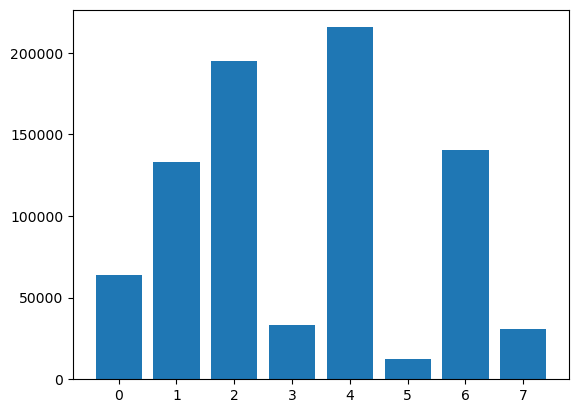

In [24]:
# Show current distribution of class data
distribution = np.zeros((NUM_CLASSES,1))
for i in range(NUM_CLASSES):
    distribution[i] = np.sum(train_labels_pp['label']==i)
plt.bar(range(NUM_CLASSES), distribution[:,0])
plt.show()

In [25]:
# Create new balanced train set
train_labels_pp_balanced = train_labels_pp.copy()

max_class_size = np.max(distribution)
for i in range(NUM_CLASSES):
    num_additional_data = max_class_size - distribution[i,0]
    
    if num_additional_data > 0:
        class_indices = np.where(train_labels_pp['label']==i)[0] # indices in the file of class i
        repeat_indices = np.random.randint(0, len(class_indices), num_additional_data.astype('int')) # get indices to repeat (randomly)
        new_data_indices = class_indices[repeat_indices] # now get the indices from the labels file
        
        train_labels_pp_balanced = pd.concat([train_labels_pp_balanced, train_labels_pp.iloc[new_data_indices]])
        
train_labels_pp_balanced

,image_name,label,P,speed,accel,ed,heating,res_heat,stripe,concentric,island
0,layer83_3097.png,4,-0.379935,-0.833437,0.018591,0.141539,0,-0.732373,1,0,1
1,layer2_1957.png,2,0.412525,0.598585,0.020722,-0.365503,0,-0.926124,1,0,1
2,layer169_2467.png,6,0.412525,0.599114,0.017709,-0.365699,0,-1.065468,1,0,0
3,layer117_6323.png,4,-0.379378,-0.832097,0.020722,0.140702,0,-0.341092,0,1,0
4,layer107_1606.png,4,-2.340168,-1.329356,0.018591,-0.413188,0,-0.630931,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
656326,layer119_736.png,7,1.468121,0.600072,0.020722,-0.084061,0,0.981844,1,0,1
761597,layer183_2659.png,7,0.412525,-0.898656,0.944315,0.543515,0,1.362151,0,1,1
106181,layer54_5493.png,7,0.412488,0.601366,0.022852,-0.366540,0,1.231195,0,1,1
695239,layer151_807.png,7,0.412525,0.601052,0.023735,-0.366414,0,2.184151,1,0,1


In [26]:
# sort by label
train_labels_pp_balanced = train_labels_pp_balanced.sort_values(by=['label'])
train_labels_pp_balanced

,image_name,label,P,speed,accel,ed,heating,res_heat,stripe,concentric,island
154434,layer157_1563.png,0,0.412525,0.602798,0.020722,-0.367058,0,1.913719,1,0,0
91203,layer27_2613.png,0,0.412525,0.591692,-0.079431,-0.362953,0,0.977196,0,1,1
818459,layer137_2383.png,0,0.396544,0.569060,-0.191691,-0.358819,0,1.668523,1,0,1
655168,layer220_2344.png,0,0.412525,0.599262,0.020722,-0.365754,0,0.460769,1,0,1
654620,layer239_2866.png,0,1.469189,0.601652,0.020722,-0.084474,0,0.164130,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19079,layer108_6238.png,7,-0.379726,-0.833033,0.020722,0.141304,0,-0.689804,0,1,0
382682,layer65_863.png,7,0.412821,0.601823,0.020722,-0.366619,0,1.753191,1,0,1
764147,layer208_581.png,7,0.412525,0.600603,0.020722,-0.366248,0,-0.740085,1,0,1
564830,layer39_3484.png,7,0.412525,0.602067,0.022852,-0.366788,0,2.132595,0,1,1


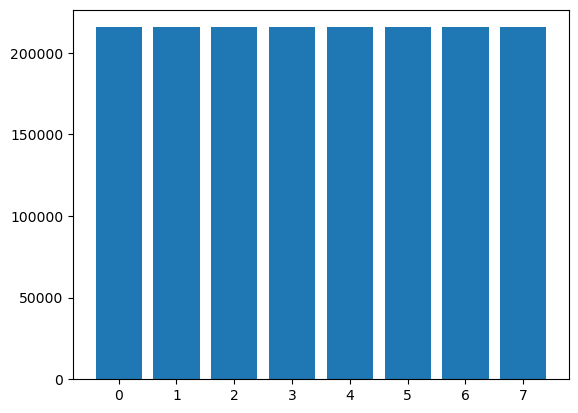

In [27]:
# Now have even distribution of data
new_distribution = np.zeros((NUM_CLASSES,1))
for i in range(NUM_CLASSES):
    new_distribution[i] = np.sum(train_labels_pp_balanced['label']==i)
plt.bar(range(NUM_CLASSES), new_distribution[:,0])
plt.show()

In [28]:
# Save the file
# train_labels_pp_balanced.to_csv('neural_network_data/train_labels_pp_limited_scan_balanced_3d_8.csv',header=True, index=False)
train_labels_pp_balanced.to_csv('neural_network_data/train_labels_pp_limited_scan_small_RT_balanced_3d_8.csv',header=True, index=False)

### Reduce data size for faster training 

In [29]:
DESIRED_NUM_IMAGES = 150000
new_images_per_class = round(DESIRED_NUM_IMAGES / NUM_CLASSES)

train_labels_pp_balanced

,image_name,label,P,speed,accel,ed,heating,res_heat,stripe,concentric,island
154434,layer157_1563.png,0,0.412525,0.602798,0.020722,-0.367058,0,1.913719,1,0,0
91203,layer27_2613.png,0,0.412525,0.591692,-0.079431,-0.362953,0,0.977196,0,1,1
818459,layer137_2383.png,0,0.396544,0.569060,-0.191691,-0.358819,0,1.668523,1,0,1
655168,layer220_2344.png,0,0.412525,0.599262,0.020722,-0.365754,0,0.460769,1,0,1
654620,layer239_2866.png,0,1.469189,0.601652,0.020722,-0.084474,0,0.164130,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19079,layer108_6238.png,7,-0.379726,-0.833033,0.020722,0.141304,0,-0.689804,0,1,0
382682,layer65_863.png,7,0.412821,0.601823,0.020722,-0.366619,0,1.753191,1,0,1
764147,layer208_581.png,7,0.412525,0.600603,0.020722,-0.366248,0,-0.740085,1,0,1
564830,layer39_3484.png,7,0.412525,0.602067,0.022852,-0.366788,0,2.132595,0,1,1


In [30]:
num_samples_per_class = np.sum(train_labels_pp_balanced['label']==0)
new_indx = np.random.choice(num_samples_per_class, size=new_images_per_class, replace=False)
train_labels_pp_balanced_small = pd.DataFrame()
for ii in range(NUM_CLASSES):
    new_class_set = np.where(train_labels_pp_balanced['label']==ii)[0][new_indx]
    train_labels_pp_balanced_small = pd.concat([train_labels_pp_balanced_small, train_labels_pp_balanced.iloc[new_class_set]])

In [31]:
# train_labels_pp_balanced_small.to_csv('neural_network_data/train_labels_pp_limited_scan_balanced_small_3d_8.csv',header=True, index=False)
train_labels_pp_balanced_small.to_csv('neural_network_data/train_labels_pp_limited_scan_small_RT_balanced_small_3d_8.csv',header=True, index=False)

### Add X/Y Coordinates to Process Parameters

In [ ]:
# Load data
train_labels_pp = pd.read_csv('neural_network_data/train_labels_pp_RTC8.csv')
train_labels_pp

In [ ]:
train_labels_pp = train_labels_pp.sort_values(by=['image_name'])
train_labels_pp

In [ ]:
# need to load x-y coordinates for all of these
last_layer = 0
image_names = np.array(train_labels_pp['image_name'])

X_coord = np.zeros(len(train_labels_pp))
Y_coord = np.zeros(len(train_labels_pp))

for ii in tqdm(range(len(train_labels_pp))):
    
    current_image_name = image_names[ii]
    current_layer = int(current_image_name[5:current_image_name.find('_')])
    image_num = int(current_image_name[current_image_name.find('_')+1:current_image_name.find('.png')])
    
    # Load csv file if layer is different
    if current_layer != last_layer:
        last_layer = current_layer
    
        if current_layer < 10:
            layer_text = 'layer000' + str(current_layer)
        elif current_layer < 100:
            layer_text = 'layer00' + str(current_layer)
        else:
            layer_text = 'layer0' + str(current_layer)
              
        data = pd.read_csv(DATA_DIR + 'T500_3D_Scan_Strategies_fused_' + layer_text + '.csv', header=None, 
                       names=['X', 'Y', 'P', 'T', 'deprecated'])
        
        # Collect the important info
        X = np.array(data['X'])
        Y = np.array(data['Y'])
        T = np.array(data['T'])
        indx = np.where(T!=0)
        X = X[indx]
        Y = Y[indx]

    X_coord[ii] = X[image_num-1]
    Y_coord[ii] = Y[image_num-1]
    

In [ ]:
train_labels_pp['X'] = X_coord
train_labels_pp['Y'] = Y_coord

In [ ]:
train_labels_pp = train_labels_pp.sort_values(by=['label'])
train_labels_pp

In [ ]:
# Save as excel file
train_labels_pp.to_excel('neural_network_data/train_labels_pp_x_y.xlsx',header=True, index=False)

### Visualize Process Parameters 

In [ ]:
train_labels_pp = pd.read_excel('neural_network_data/train_labels_pp_x_y.xlsx')
train_labels_pp

In [ ]:
X = np.array(train_labels_pp['X'])
Y = np.array(train_labels_pp['Y'])
P = np.array(train_labels_pp['P'])
ed = np.array(train_labels_pp['ed'])
labels = np.array(train_labels_pp['label'])
res_heat = np.array(train_labels_pp['res_heat'])

In [ ]:
plt.scatter(X,Y,c=res_heat, s=2)
plt.show()

In [ ]:
plt.scatter(range(len(ed)), res_heat)
plt.show()

In [ ]:
np.min(ed)

In [ ]:
layer_num = 'layer0029'
pp_data = pd.read_excel('process_parameters/by_layer/' + layer_num + '.xlsx', header=None)
P = np.array(pp_data[0])
V = np.array(pp_data[1])
ed = np.array(pp_data[5])
res_heat = np.array(pp_data[8])
# outlier_indx = np.where(ed>1)
# ed[outlier_indx] = 0.6
plt.scatter(range(len(ed)), ed)
plt.show()

In [ ]:
normalize_ed = (ed - np.mean(ed)) / np.std(ed)
plt.scatter(range(len(ed)), normalize_ed)
plt.show()

In [ ]:
pp_data

In [ ]:
outlier_indx = np.where(ed>100)

In [ ]:
P[outlier_indx]

In [ ]:
V[outlier_indx]

In [ ]:
new_ed = np.array(pp_data[5])
new_ed[np.where(new_ed>1)] = 1
pp_data[5] = new_ed
np.max(new_ed)

In [ ]:
pp_data

In [ ]:
new_ed = np.array(pp_data[5])
np.min(new_ed)

In [ ]:
train_labels_pp = pd.read_csv('neural_network_data/train_labels_pp_limited_RTC6.csv')
labels = train_labels_pp['label']
mean_pp = np.zeros((6,6))
std_pp = np.zeros((6,6))
for ii in range(6):
    P_ii = train_labels_pp['P'][np.where(labels == ii)[0]]
    speed_ii = train_labels_pp['speed'][np.where(labels == ii)[0]]
    accel_ii = train_labels_pp['accel'][np.where(labels == ii)[0]]
    ed_ii = train_labels_pp['ed'][np.where(labels == ii)[0]]
    heating_ii = train_labels_pp['heating'][np.where(labels == ii)[0]]
    res_heat_ii = train_labels_pp['res_heat'][np.where(labels == ii)[0]]
    
    mean_pp[ii,0] = np.mean(P_ii)
    mean_pp[ii,1] = np.mean(speed_ii)
    mean_pp[ii,2] = np.mean(accel_ii)
    mean_pp[ii,3] = np.mean(ed_ii)
    mean_pp[ii,4] = np.mean(heating_ii)
    mean_pp[ii,5] = np.mean(res_heat_ii)
    
    std_pp[ii,0] = np.std(P_ii)
    std_pp[ii,1] = np.std(speed_ii)
    std_pp[ii,2] = np.std(accel_ii)
    std_pp[ii,3] = np.std(ed_ii)
    std_pp[ii,4] = np.std(heating_ii)
    std_pp[ii,5] = np.std(res_heat_ii)

In [ ]:
pp_labels = ['P', 'speed', 'accel', 'ed', 'heating', 'res_heat']
for ii in range(6):
    plt.errorbar(range(6), mean_pp[:,ii], std_pp[:,ii], linestyle='None', marker='^')
    plt.title(pp_labels[ii])
    plt.show()

In [ ]:
np.where(labels == 0)[0]

In [ ]:
name = image_name[506789]
name

In [ ]:
pp_norm.to_excel('process_parameters/normalized_pp_no_outliers_with_scanstrategy.xlsx',header=False, index=False)

### Remove the heating PP from the files

In [2]:
train_data = pd.read_csv('neural_network_data/train_labels_pp_limited_scan_small_RT_balanced_small_3d_8.csv')
new_train_data = train_data.drop(labels='heating', axis='columns')

dev_data = pd.read_csv('neural_network_data/dev_labels_pp_limited_scan_small_RT_3d_8.csv')
new_dev_data = dev_data.drop(labels='heating', axis='columns')

test_data = pd.read_csv('neural_network_data/test_labels_pp_limited_scan_small_RT_3d_8.csv')
new_test_data = test_data.drop(labels='heating', axis='columns')

# train_data = pd.read_csv('neural_network_data/train_labels_pp_limited_balanced_RTC6.csv')
# new_train_data = train_data.drop(labels='heating', axis='columns')

# dev_data = pd.read_csv('neural_network_data/dev_labels_pp_limited_RTC6.csv')
# new_dev_data = dev_data.drop(labels='heating', axis='columns')

# test_data = pd.read_csv('neural_network_data/test_labels_pp_limited_RTC6.csv')
# new_test_data = test_data.drop(labels='heating', axis='columns')

In [3]:
new_train_data.to_csv('neural_network_data/train_labels_pp_no_heating_scan_small_RT_balanced_small_3d_8.csv', header=True, index=False)
new_dev_data.to_csv('neural_network_data/dev_labels_pp_no_heating_scan_small_RT_3d_8.csv',header=True, index=False)
new_test_data.to_csv('neural_network_data/test_labels_pp_no_heating_scan_small_RT_3d_8.csv',header=True, index=False)

# new_train_data.to_csv('neural_network_data/train_labels_pp_no_heating_balanced_RTC6.csv', header=True, index=False)
# new_dev_data.to_csv('neural_network_data/dev_labels_pp_no_heating_RTC6.csv',header=True, index=False)
# new_test_data.to_csv('neural_network_data/test_labels_pp_no_heating_RTC6.csv',header=True, index=False)

In [4]:
new_train_data

,image_name,label,P,speed,accel,ed,res_heat,stripe,concentric,island
0,layer16_1384.png,0,0.412525,0.606090,0.018591,-0.368270,-1.169876,1,0,1
1,layer213_4656.png,0,-0.642809,0.606897,0.092811,-0.649986,-0.528099,0,1,0
2,layer24_904.png,0,1.468283,0.600245,0.022852,-0.084094,1.580042,0,1,0
3,layer41_699.png,0,-0.604563,-1.234194,0.284971,0.412689,0.948838,1,0,1
4,layer172_1388.png,0,0.412525,0.602057,0.020722,-0.366785,-1.146851,1,0,1
...,...,...,...,...,...,...,...,...,...,...
149995,layer54_2955.png,7,0.410164,0.597109,0.023735,-0.365589,-0.461605,0,1,1
149996,layer54_1955.png,7,0.412713,0.601828,0.020722,-0.366650,2.166385,0,1,1
149997,layer17_1353.png,7,0.412755,0.601890,0.017709,-0.366662,-0.961014,1,0,1
149998,layer54_4279.png,7,-0.642217,-1.310034,-0.009557,0.479373,1.287294,0,1,1
